<a href="https://colab.research.google.com/github/sangeethapk/AI-ML/blob/main/IntermediateAssesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pre-processing trining dataset

In [157]:
#Load the data
import pandas as pd
train_df=pd.read_csv('/content/train_LZdllcl.csv')
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [158]:
#drop user id
train_df.drop('employee_id',axis=1,inplace=True)

In [159]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


<Axes: >

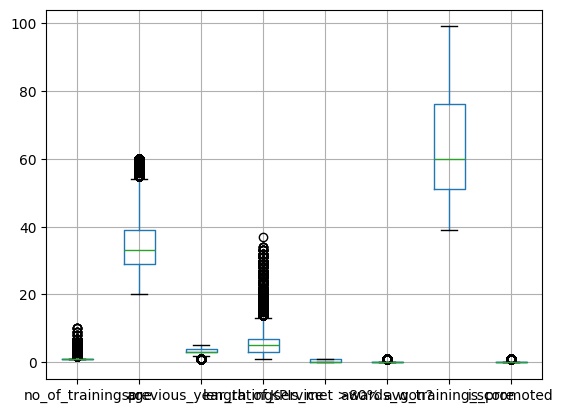

In [160]:
train_df.boxplot()

In [161]:
skewness_values = train_df.select_dtypes(include=['number']).skew()
print(skewness_values)

no_of_trainings         3.445434
age                     1.007432
previous_year_rating   -0.310638
length_of_service       1.738061
KPIs_met >80%           0.619909
awards_won?             6.338914
avg_training_score      0.451908
is_promoted             2.972339
dtype: float64


In [162]:
import pandas as pd

# Copy to avoid changing original
df = train_df.copy()

# List of skewed columns to cap (based on your skewness results)
skewed_columns = [
    'no_of_trainings',
    'length_of_service',
    'awards_won?',
    'age'
]

for col in skewed_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR

    # Apply capping
    df[col] = df[col].clip(lower=lower_cap, upper=upper_cap)

# Re-check skewness after capping
new_skewness = df[skewed_columns].skew()
print("Skewness after IQR capping:")
print(new_skewness)


Skewness after IQR capping:
no_of_trainings      0.000000
length_of_service    0.705358
awards_won?          0.000000
age                  0.855553
dtype: float64


In [163]:
import numpy as np

df['length_of_service'] = np.log1p(df['length_of_service'])
df['age'] = np.log1p(df['age'])
print(df[['length_of_service', 'age']].skew())



length_of_service   -0.209564
age                  0.409677
dtype: float64


Split features and target

In [164]:
#get X and y value
X=df.drop('is_promoted',axis=1)
y=df['is_promoted']
#

In [165]:
#find imbalance in y
y.value_counts()

,count
is_promoted,
0,50140
1,4668


In [166]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Remove NUll value from X_train

In [167]:
#Handle missing values in X_train
X_train.isnull().sum()

,0
department,0
region,0
education,1949
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,3303
length_of_service,0
KPIs_met >80%,0


In [168]:
#impute missing values' most frequent' value for education
mode_education=X_train['education'].mode()[0]
X_train['education']=X_train['education'].fillna(mode_education)
#impute previous_year_rating
X_train['previous_year_rating']=X_train['previous_year_rating'].fillna(X_train['previous_year_rating'].median())


In [169]:
X_train.isnull().sum()

,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
KPIs_met >80%,0


Remove null value from X_test using smae method

In [170]:
X_test.isnull().sum()

,0
department,0
region,0
education,460
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,821
length_of_service,0
KPIs_met >80%,0


In [171]:
#impute missing values' most frequent' value for education
mode_education=X_test['education'].mode()[0]
X_test['education']=X_test['education'].fillna(mode_education)
#impute previous_year_rating
X_test['previous_year_rating']=X_test['previous_year_rating'].fillna(X_test['previous_year_rating'].median())

In [172]:
X_test.isnull().sum()

,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0
KPIs_met >80%,0


Encode

In [173]:
#encode X_train and X_test data using for loop for all cat values
#take number cols and object cols in different array
num_cols=X_train.select_dtypes(include=['number']).columns
obj_cols=X_train.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in obj_cols:
  X_train[col]=le.fit_transform(X_train[col])
  X_test[col]=le.transform(X_test[col])



Scale

In [174]:
#scale X_train and X_test numeric values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
for col in num_cols:
  X_train[col]=scaler.fit_transform(X_train[[col]])
  X_test[col]=scaler.transform(X_test[[col]])
  test_df[col]=scaler.transform(test_df[[col]])
print(num_cols)

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')


SMOTE

In [175]:
#Smote
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)

In [176]:
cat_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']

# Convert training categorical columns
for col in cat_cols:
    train_df[col] = pd.Categorical(train_df[col])

cat_mappings = {col: train_df[col].cat.categories for col in obj_cols}


Train the models

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



# List of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),

}

# Train and evaluate
results = []

for name, model in models.items():
    # Use scaled data for models that are sensitive to feature scale
    if name in ['SVM', 'Logistic Regression', 'KNN', 'Naive Bayes']:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0)
    })

#. Show results as table
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:10:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


                 Model  Accuracy  Precision    Recall  F1 Score
7              XGBoost  0.938971   0.787952  0.360132  0.494331
2        Random Forest  0.920452   0.528391  0.368943  0.434501
1        Decision Tree  0.889710   0.369244  0.468062  0.412822
3    Gradient Boosting  0.855501   0.287421  0.503304  0.365893
6                  KNN  0.804963   0.221215  0.537445  0.313423
4                  SVM  0.673144   0.180864  0.834802  0.297313
0  Logistic Regression  0.713282   0.183338  0.712555  0.291638
5          Naive Bayes  0.700237   0.178649  0.727974  0.286892


Hyperparameter Tunning

In [178]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_and_evaluate_model(name, model, param_grid, X_train, y_train, X_test, y_test):
    print(f"Training {name}...")
    grid = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    return {
        'Model': name,
        'Best Params': grid.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0),
        'Estimator': best_model
    }


In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 🟢 Batch 1
batch1 = [
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(max_iter=1000),
        'params': {'C': [0.1, 1, 10], 'solver': ['liblinear']}
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5]}
    },
    {
        'name': 'KNN',
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7]}
    }
]

# 🟡 Batch 2
batch2 = [
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [50, 100], 'max_depth': [10, 20]}
    },
    {
        'name': 'Gradient Boosting',
        'model': GradientBoostingClassifier(),
        'params': {'n_estimators': [50, 100], 'learning_rate': [0.1, 0.01]}
    },
    {
        'name': 'Naive Bayes',
        'model': GaussianNB(),
        'params': {}  # No params
    }
]

# 🔴 Batch 3
batch3 = [

    {
        'name': 'XGBoost',
        'model': XGBClassifier(eval_metric='logloss', use_label_encoder=False),
        'params': {'max_depth': [3, 5], 'n_estimators': [50, 100], 'learning_rate': [0.1, 0.01]}
    }
]


In [180]:
def run_batch(batch, X_train, y_train, X_test, y_test):
    batch_results = []
    for m in batch:
        result = train_and_evaluate_model(
            m['name'], m['model'], m['params'],
            X_train, y_train, X_test, y_test
        )
        batch_results.append(result)
    return pd.DataFrame(batch_results).sort_values(by='F1 Score', ascending=False)

# Run batches
batch1_results = run_batch(batch1, X_train, y_train, X_test, y_test)





Training Logistic Regression...
Training Decision Tree...
Training KNN...


In [181]:
batch2_results = run_batch(batch2, X_train, y_train, X_test, y_test)

Training Random Forest...
Training Gradient Boosting...
Training Naive Bayes...


In [182]:
batch3_results = run_batch(batch3, X_train, y_train, X_test, y_test)

Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:16:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [183]:
# Get top model from each batch
top1 = batch1_results.iloc[0]
top2 = batch2_results.iloc[0]
top3 = batch3_results.iloc[0]

In [184]:
final_compare = pd.DataFrame([top1, top2, top3]).sort_values(by='F1 Score', ascending=False)

print("\n📊 Final Comparison of Top Models from Each Batch:")
print(final_compare[['Model', 'Best Params', 'Accuracy', 'Precision', 'Recall', 'F1 Score']])

best_model = final_compare.iloc[0]
print("\n Best Overall Model:")
print(f"Model: {best_model['Model']}")
print(f"F1 Score: {best_model['F1 Score']:.4f}")
print(f"Best Params: {best_model['Best Params']}")


📊 Final Comparison of Top Models from Each Batch:
           Model                                        Best Params  Accuracy  \
0        XGBoost  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...  0.914614   
0  Random Forest             {'max_depth': 20, 'n_estimators': 100}  0.902846   
1  Decision Tree          {'max_depth': 20, 'min_samples_split': 5}  0.888342   

   Precision    Recall  F1 Score  
0   0.482843  0.433921  0.457077  
0   0.412681  0.408590  0.410625  
1   0.363322  0.462555  0.406977  

 Best Overall Model:
Model: XGBoost
F1 Score: 0.4571
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


Best Model is LightGBM

Preprocess Test Set & Predict

In [185]:
# Load your test dataset
test_df = pd.read_csv("/content/test_2umaH9m.csv")
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [186]:
#drop employee_id
test_df.drop('employee_id',axis=1,inplace=True)

In [187]:
test_df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [188]:
#scale
num_cols=['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score']
scaler=StandardScaler()
for col in num_cols:
  test_df[col]=scaler.fit_transform(test_df[[col]])

In [189]:
#previos_year_rating
test_df['previous_year_rating']=test_df['previous_year_rating'].fillna(test_df['previous_year_rating'].median())
#education
mode_education=test_df['education'].mode()[0]
test_df['education']=test_df['education'].fillna(mode_education)

In [190]:

for col in obj_cols:
  test_df[col] = test_df[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

In [191]:


# Copy to avoid changing original
dft = test_df.copy()

# List of skewed columns to cap (based on your skewness results)
skewed_columns = [
    'no_of_trainings',
    'length_of_service',
    'awards_won?',
    'age'
]

for col in skewed_columns:
    Q1 = dft[col].quantile(0.25)
    Q3 = dft[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR

    # Apply capping
    dft[col] = dft[col].clip(lower=lower_cap, upper=upper_cap)

# Re-check skewness after capping
new_skewness = dft[skewed_columns].skew()
print("Skewness after IQR capping:")
print(new_skewness)

Skewness after IQR capping:
no_of_trainings      0.000000
length_of_service    0.722602
awards_won?          0.000000
age                  0.862398
dtype: float64


In [193]:
dft['length_of_service'] = np.log1p(dft['length_of_service'])
dft['age'] = np.log1p(dft['age'])
print(dft[['length_of_service', 'age']].skew())

length_of_service   -0.554650
age                 -1.934466
dtype: float64


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Predict test values

In [198]:
test_predictions=best_model['Estimator'].predict(dft)

In [200]:
import pandas as pd

# Load sample submission
submission = pd.read_csv('/content/sample_submission_M0L0uXE.csv')


# Replace target column in submission
submission['is_promoted'] = test_predictions
# Create a folder (if it doesn't exist)
import os
os.makedirs('/content/submissions', exist_ok=True)

# Save CSV to that folder
submission.to_csv('/content/submissions/my_submission.csv', index=False)


print("Submission file saved as my_submission.csv")


Submission file saved as my_submission.csv
